<a href="https://colab.research.google.com/github/bmjaron/phase_3_project/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Business Understanding

Our client is SyriaTel, which is a telecommunications company. SyriaTel is facing the problem of customer churning, which causes a loss in profits. In order to address this, SyriaTel wants to offer customers that are likely to churn special benefits in order to maintain their business and ensure a long-term relationship. SyriaTel has presented us with customer data and asked us to build a model to predict customer churn. This model will, in turn, provide the client with a method to identify which customers to conciliate.

# II. Data Understanding

##1. Data Collection and Description

To begin, we'll import our relevant libraries, then load and preview the data.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [105]:
#Load data
df = pd.read_csv('https://raw.githubusercontent.com/bmjaron/phase_3_project/main/data')

#Preview
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [106]:
#Return shape of data
df.shape

(3333, 21)

The data has 3,333 entries, all of which are different customers. There are also 21 distinct features, the last column represents whether or not the customer churned, and this will be our target. The other 20 columns represent various details about the given customer, including the customer's state and service usage.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Our data is remarkably clean, and contains no null values.

In [108]:
#Return descriptive statistics of numeric features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


This begins to give us an idea of a customer's mean service usage.

##2. Data Exploration

###**A. Class Imbalance**

A general trend with churn classification problems is that there tends to be class imbalance, meaning that more customers tend to stay with the company than churn. This is something that will have to be accounted for in our modeling. But first, we must confirm this assumption.

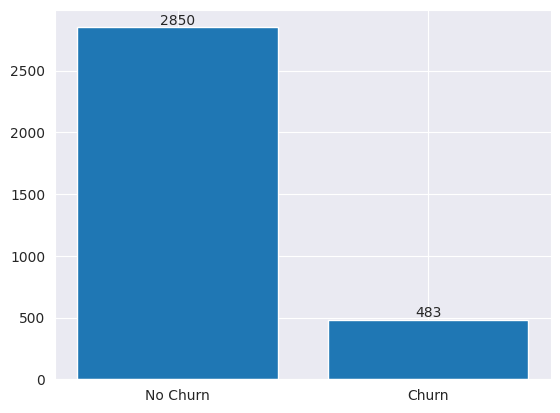

In [109]:
#Return value counts of churn
churn_count = [df['churn'].value_counts()[0], df['churn'].value_counts()[1]]

#Plot the value counts
fig, ax = plt.subplots()

bar = ax.bar(x=['No Churn', 'Churn'], height=churn_count)
#Show bar labels
ax.bar_label(bar)
plt.show()

In our data preparation stage, we'll create synthetic samples of our minority class.

###**B. Relationship between customer service calls and churn**

We'll next want to visually explore how certain features interact with churn. We can really group our features into a few subsets.


1.   **Customer information:** this includes the features such as state, area code, phone number, etc.
2.   **Plan information:** this includes the details of the plan of a given customers. The features here are international plan and voicemail plan.
3. **Usage and charges:** this accounts for the bulk of the features, and includes the features for amount of calls, minutes and charges.
4. **Customer service interaction:** this is the column customer service calls, and shows how many times the customer reached out to customer service.

Our initial thought is that a customer that frequently speaks with customer service is an unhappy customer, and therefore likely to churn. Let's probe this assumption. To begin, we'll first get an idea of the frequency distributions of customer service calls.



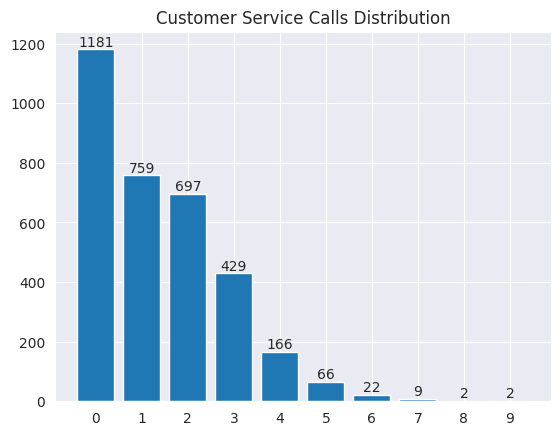

In [110]:
fig, ax = plt.subplots()

#Prepare a list of the labels
labels = ['0','1','2','3', '4','5','6','7','8','9']

#Create bar plot with labels and count of customer service calls
bar = ax.bar(x=labels, height=df['customer service calls'].value_counts())

#Print labels for bars
ax.bar_label(bar)
ax.set_title('Customer Service Calls Distribution')

plt.show()


As we can see, an overwhelming majority of customers called customer service less than 3 times.

In [111]:
#Create new data frame to show metrics for customer service calls
df_2 = df[['customer service calls', 'churn']]

#Create lists containing metrics for churn count, no churn count, and total calls
churn = [df_2.groupby('customer service calls').sum()['churn'][calls] for calls in range(0,10)]
no_churn = [df_2['customer service calls'].value_counts()[calls]-churn[calls] for calls in range(0,10)]
churn_percentage = [churn[calls]/(churn[calls]+no_churn[calls]) for calls in range(0,10)]

#Create pivot table that returns number of customer service calls and churn percentage
pivot_df = pd.pivot_table(data=df_2, index='customer service calls')

#Rename the column to churn percentage
pivot_df.rename(columns={'churn': 'churn_percentage'}, inplace=True)

#Add new columns from lists above
pivot_df['count'] = df['customer service calls'].value_counts()
pivot_df['churn'] = pd.Series(churn)
pivot_df['no_churn'] = pd.Series(no_churn)

pivot_df

,churn_percentage,count,churn,no_churn
customer service calls,,,,
0,0.131994,697,92,605
1,0.103302,1181,122,1059
2,0.114625,759,87,672
3,0.102564,429,44,385
4,0.457831,166,76,90
5,0.606061,66,40,26
6,0.636364,22,14,8
7,0.555556,9,5,4
8,0.500000,2,1,1


The above table lets us look at the numerics. We see the churn percentage begin to increase as the amount of customer service calls increases. Below, we'll depict this with plots.

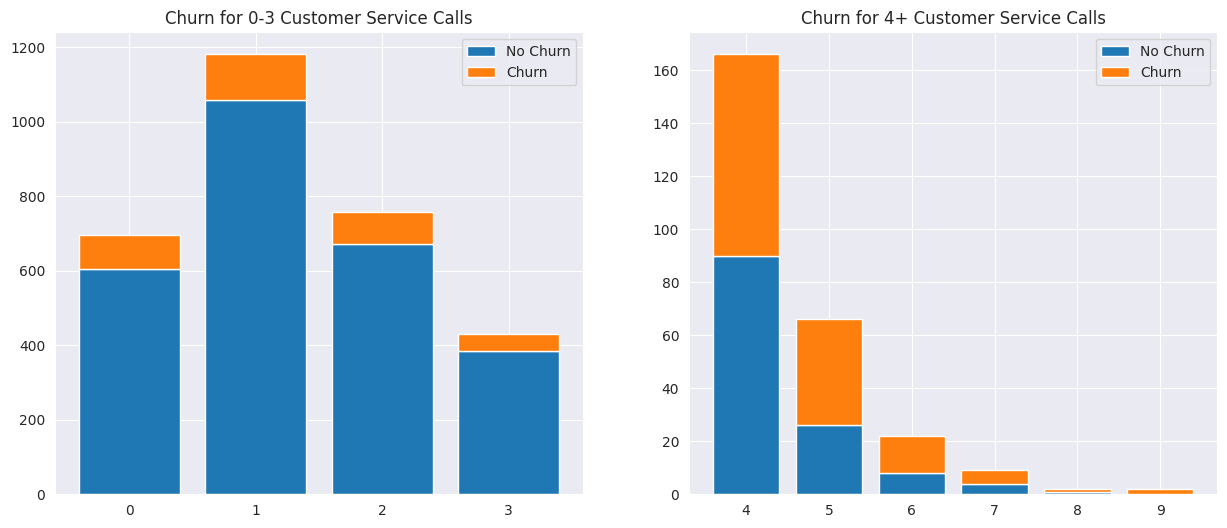

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

#Draw bar plot showing churn/no churn for customers who made 0-3 calls
axes[0].bar(x=labels[0:4], height=no_churn[0:4], label='No Churn')
axes[0].bar(x=labels[0:4], height=churn[0:4], bottom=no_churn[0:4], label='Churn')
axes[0].legend()
axes[0].set_title('Churn for 0-3 Customer Service Calls')

#Draw bar plot showing churn/no churn for customers who made 4-9 calls
axes[1].bar(x=labels[4:], height=no_churn[4:], label='No Churn')
axes[1].bar(x=labels[4:], height=churn[4:], bottom=no_churn[4:], label='Churn')
axes[1].legend()
axes[1].set_title('Churn for 4+ Customer Service Calls');

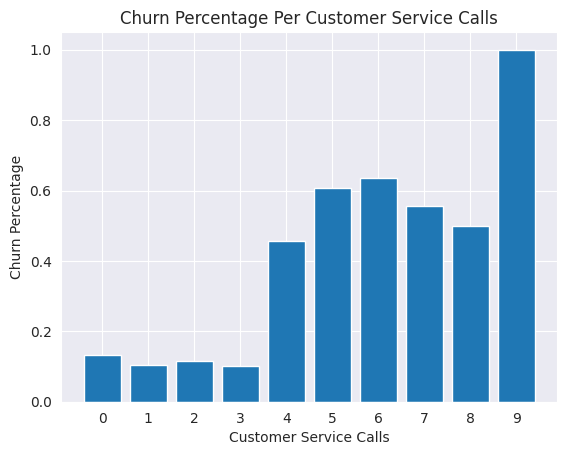

In [113]:
#Draw bar plot showing churn percentage
plt.bar(labels, pivot_df['churn_percentage'])
plt.title('Churn Percentage Per Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn Percentage');

As we can see from our table and bar charts, customers who made less than 3 customer service calls had a very small rate of churn (roughly 10%). On the other hand, customers who frequently spoke with customer service had a high rate of churn (roughly 50% or more). This supports our assumption that customers who make more customer service calls are generally unhappy, and are resultingly likely to churn.

###**C. Domestic usage, fees and churn**

The correlation between high service usage (and therefore more payments) and churn is harder to predict. Perhaps a customer that makes frequent calls is reliant on the service and unlikely to churn, whereas a customer with lower usage is likely to jump for a cheaper alternative. Or maybe customers that use the service frequently have more negative experiences which would make them likely to churn.

In order to begin to analyze this, we're first going to look at some frequency distributions of usage and payments. To simplify things for now, we're going to create new features entitled ```'total_calls'```, ```'total_charges'```, and ```'total_minutes'``` and look at frequency distributions and bar plots.

As noted in the title of this section, this analysis is only going to focus on domestic usage and fees. We'll explore international activity in a separate section.

In [114]:
#Create copy of original data frame
df_3 = df.copy()

#Create list to serve as labels for new features
new_features = ['minutes', 'calls', 'charge']

#Loop thru feature list and create new features that sum day, evening and nighttime values
for feature in new_features:
  df_3[f'total {feature}'] = df_3[f'total day {feature}'] + df_3[f'total eve {feature}'] + df_3[f'total night {feature}']

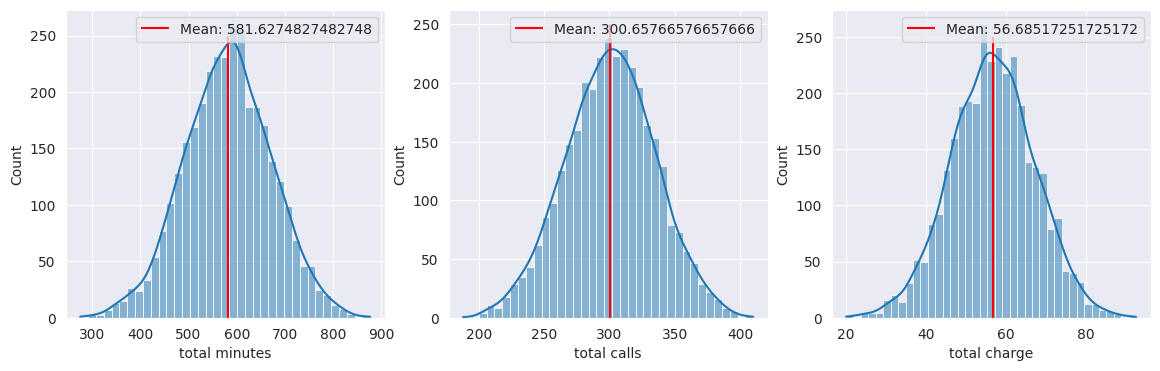

In [115]:
fig, axes = plt.subplots(1,3, figsize=(14,4))

#Plot frequency distributions
for n, feature in enumerate(new_features):
    sns.histplot(data=df_3[f'total {feature}'], kde=True, ax=axes[n])
    m = df_3[f'total {feature}'].mean() #Store mean of each feature
    axes[n].vlines(x=m, ymin=0, ymax=250, color='r', label=f'Mean: {m}') #Plot mean of each feature
    axes[n].legend()


The total amount of minutes, calls and charges are all normally distributed. We don't know for sure, but it seems that these figures represent monthly measures. It's hard to imagine that an American, on average, makes less than 1 call a day. Now, let's see how these features interact with churn.

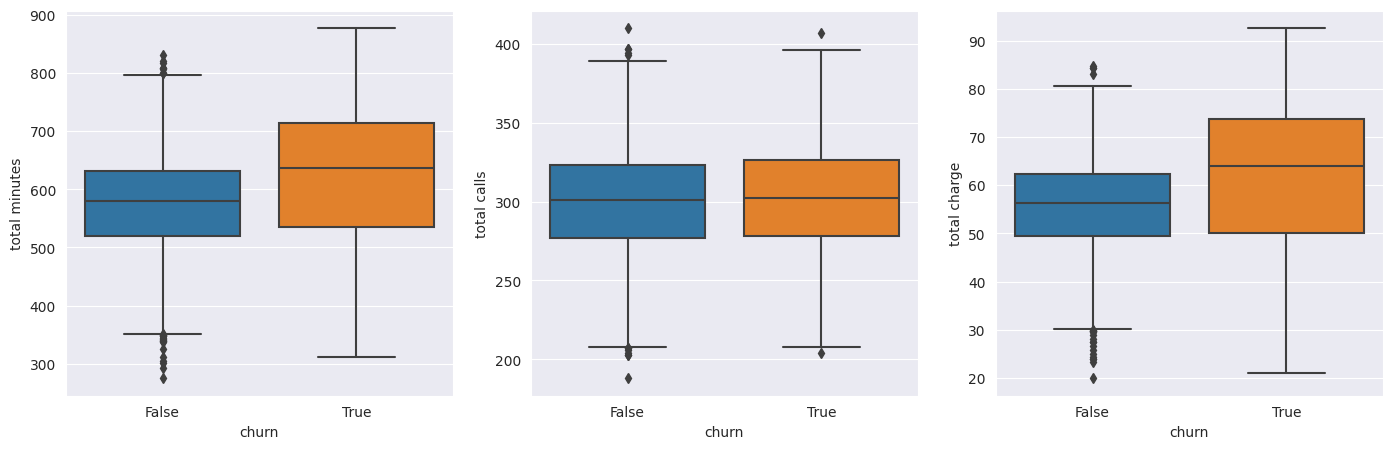

In [116]:
fig, axes = plt.subplots(1,3,figsize=(17,5))

#Loop thru features and plot box plots
for n, feature in enumerate(new_features):
  sns.boxplot(x=df['churn'], y=df_3[f'total {feature}'], ax=axes[n])

The box plots demonstrate that the customers that churned logged, in general, more minutes than those that did not churn. Additionally, customers that churned, in general, faced a higher charge than those that did not churn. On the other hand, the median and inter-quartile range of number of calls did not vary between those that churned and those that did not churn.

Minutes and charge are obviously positively correlated. It's fair to assume that charge is the real driver of churn, whereas increased minutes just raises the charge.

We're going to break ```'total charge'``` into its original subsets, look at price/minute for the different times of day, and look for a relationship with churn.

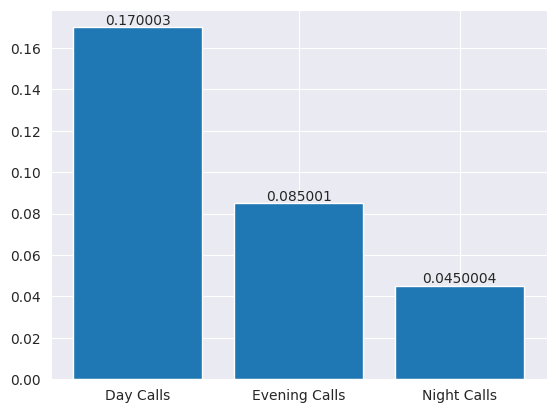

In [117]:
fig, ax = plt.subplots()

#Create list of subsets
times = ['day', 'eve', 'night']

#Create list that contains charge per minute per time of day
charge_per_minute = [np.sum(df[f'total {x} charge'])/np.sum(df[f'total {x} minutes']) for x in times]

#Put it all in a bar plot
cpm_plot = ax.bar(x=['Day Calls', 'Evening Calls', 'Night Calls'], height=charge_per_minute)

ax.bar_label(cpm_plot)

plt.show()


We see that the average charge per minute for day calls is significantly higher than the average charge per minute for evening and night calls, and expect that this will impact churn. Below, we'll look at box plots.

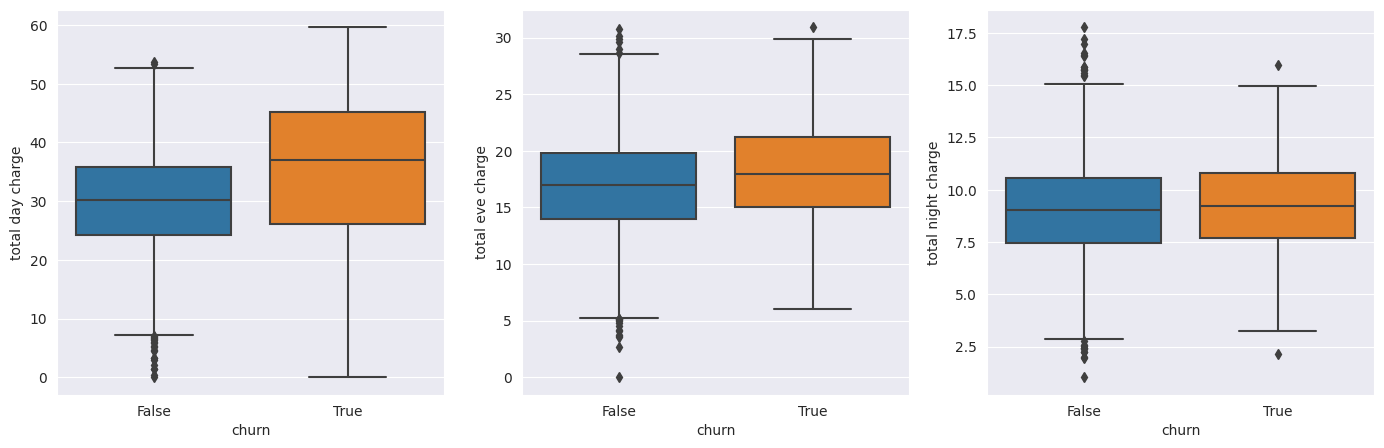

In [118]:
fig, axes = plt.subplots(1,3,figsize=(17,5))

#Loop thru times a day and draw box plots
for n, time in enumerate(times):
  sns.boxplot(x=df['churn'], y=df_3[f'total {time} charge'], ax=axes[n])

We see from the first plot that customers who churned faced a higher day charge (in general) than those that did not churn, whereas there does not seem to be a signficant impact of evening and nighttime charges on churn.

###**D. The relationship between location and churn**

Anyone who has ever used a phone knows the dreaded feeling of being in a "dead zone." It would not be a surprise if certain states were more prone to bad service than others. We'll explore this below.

In [119]:
state_df = df[['state', 'churn']]
state_df = state_df.groupby('state').sum()
state_df['total_customers'] = df['state'].value_counts()
state_df['no_churn'] = state_df['total_customers'] - state_df['churn']
state_df['churn_percentage'] = state_df['churn']/state_df['total_customers']
state_df.sort_values('churn_percentage', ascending=False).head(10)

,churn,total_customers,no_churn,churn_percentage
state,,,,
NJ,18,68,50,0.264706
CA,9,34,25,0.264706
TX,18,72,54,0.250000
MD,17,70,53,0.242857
SC,14,60,46,0.233333
MI,16,73,57,0.219178
MS,14,65,51,0.215385
NV,14,66,52,0.212121
WA,14,66,52,0.212121


In [120]:
state_df

,churn,total_customers,no_churn,churn_percentage
state,,,,
AK,3,52,49,0.057692
AL,8,80,72,0.100000
AR,11,55,44,0.200000
AZ,4,64,60,0.062500
CA,9,34,25,0.264706
CO,9,66,57,0.136364
CT,12,74,62,0.162162
DC,5,54,49,0.092593
DE,9,61,52,0.147541


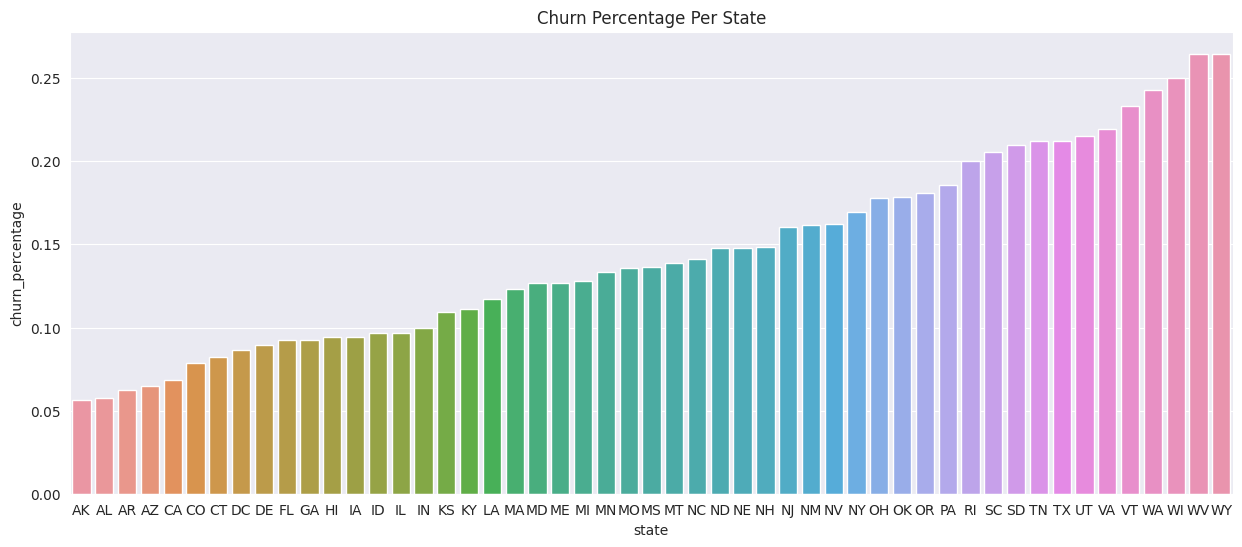

In [121]:
plt.subplots(figsize=(15,6))
sns.barplot(x=state_df.index,
            y=state_df.sort_values('churn_percentage')['churn_percentage']);
plt.title('Churn Percentage Per State');

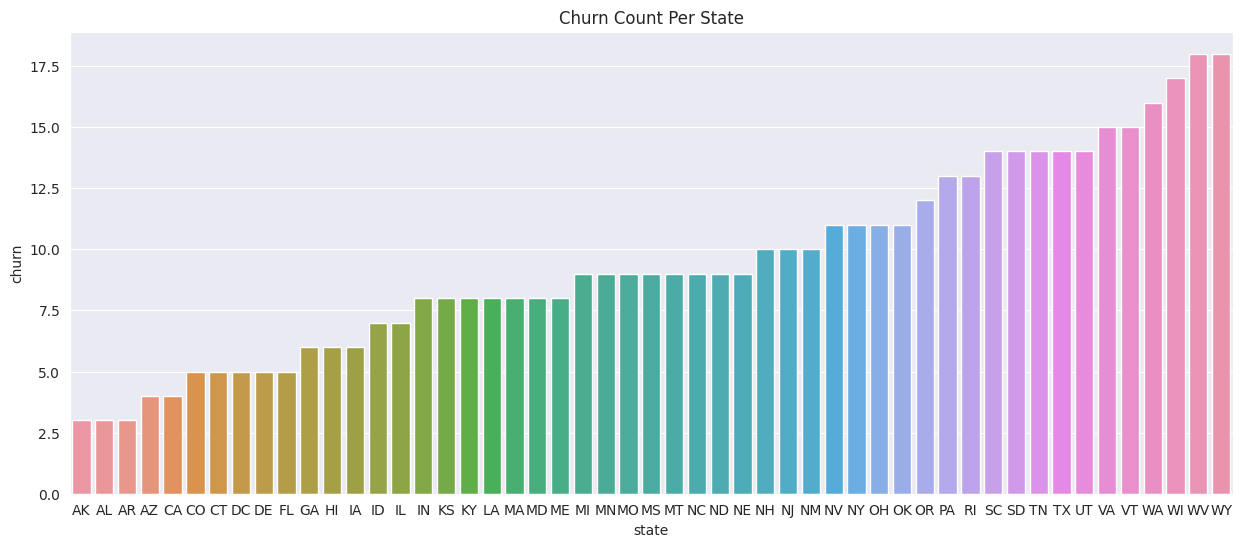

In [122]:
plt.subplots(figsize=(15,6))
sns.barplot(x=state_df.index,
            y=state_df.sort_values('churn')['churn']);
plt.title('Churn Count Per State');

We see clearly that most of the states that had the most customers to churn also had the highest churn percentages. The notable exceptions are Minnesota, New York and Montana, who despite have a high amount of customers that churned did not have the highest churn percentages. Whereas California, Washington and Maine had high churn rates, but not many customers churning.

Although there is a relationship, it's hard to imagine ```'state'``` will be used as a predictor. There's not *so* much variance amongst churn and churn percentage, and one-hot encoding 50 states serves to cloud to features.

### **E. Type of plan and churn**

The last thing to examine is how having either an international or voicemail plan affects churn. To begin we'll look at some plots.

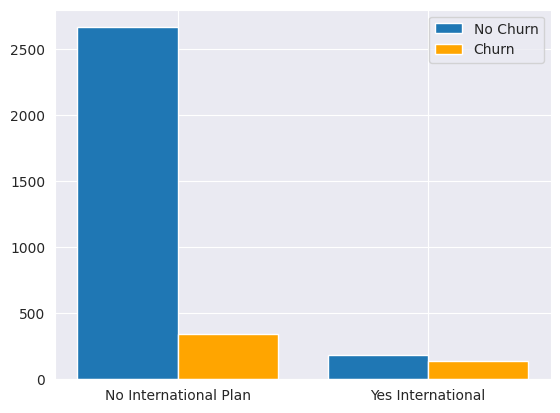

In [123]:
a = df[['international plan', 'churn']].sort_values('churn').value_counts()

x = np.arange(2)
no_churn = [a['no'][False], a['yes'][False]]
yes_churn = [a['no'][True], a['yes'][True]]
width = 0.4

# plot data in grouped manner of bar type
plt.bar(x-0.4, no_churn, width)
plt.bar(x, yes_churn, width, color='orange')
plt.xticks(x-0.2, ['No International Plan', 'Yes International'])
plt.legend(['No Churn', 'Churn']);


We see obviously that instances of churn amongst those with an international plan are close in number to those that don't churn, in stark contrast to those without an international plan that a strong majority do not churn. We'll look also at the effects of having a voice mail plan.

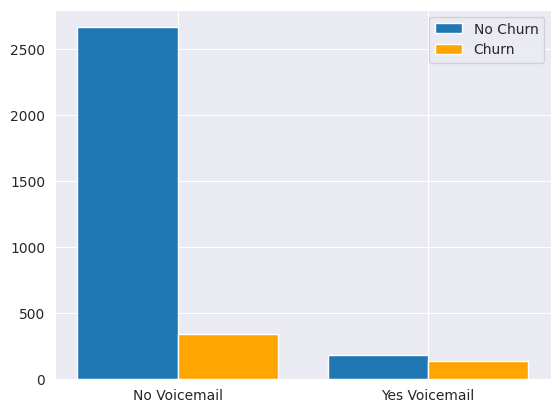

In [124]:
b = df[['voice mail plan', 'churn']].sort_values('churn').value_counts()

x = np.arange(2)
no_churn = [a['no'][False], a['yes'][False]]
yes_churn = [a['no'][True], a['yes'][True]]
width = 0.4

# plot data in grouped manner of bar type
plt.bar(x-0.4, no_churn, width)
plt.bar(x, yes_churn, width, color='orange')
plt.xticks(x-0.2, ['No Voicemail', 'Yes Voicemail'])
plt.legend(['No Churn', 'Churn']);

#III. Data Preparation

##1. Discarding unnecessary features

To begin the data preparation process we'll beging discarding features that won't be particularly valuable for modeling.

In [125]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [126]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

```'Area code'``` and ```'phone number'``` will not be useful. Additionally, we're going to drop ```'account length'```.

Despite the fact that we saw above that there is a relationship between state and churn, we're going to drop ```'state'``` from our predictors. The main reason is because we'd have to one-hot encode 50 states. This means we'd have 50+ features, which could potentially cloud our model.

Additionally, we're going to drop ```'total day minutes'```, ```'total eve minutes'```, and ```'total night minutes'```, as these determine the charge, and we want to avoid any issues of multicolinearity.

In [127]:
drop_labels = ['account length',
                'area code',
                'phone number',
                'state',
                'total day minutes',
                'total eve minutes',
                'total night minutes',
                'total intl minutes']
df = df.drop(labels=drop_labels, axis=1)

##2. One-Hot Encoding

Now, we'll one-hot encode our remaining categorical features using Pandas built-in feature.

In [128]:
df = pd.get_dummies(data=df, drop_first=True)

#IV. Modeling

In this section, we're going to take an iterative approach to modeling, where we'll begin with a baseline and continue to more complicated models.

But before we dive into the iterations, we'll outine our process. The metric that we are going to use to score the models is **recall**, which is the ratio of predicted positives to total positives. This metric is the most appropriate for our business problem. Our goal is to predict if a customer will churn so that SyriaTel can make an attempt to retain that customer. It is critical to have as many correctly identified positives (churns) as possible, with false positives (those predicted to churn that don't) not presenting as much of a problem.

In terms of testing the models, we're going to break our data into 3 sets. We'll first split the data into a training set that contains 70% of the entries. The remaining data will then be split again, with 80% (of the remaining 30%) being testing data, and the remaining 20% (of the last 30%) being hold-out data. For each model we'll find the cross-validation recall score using the training data. But we're concerned that the built-in training/test methods of the cross-validation scoring will still tend overfit the data to the training set, and therefore want to test each model on a separate testing set. The final hold-out set will have never seen any model until our very last step, where we'll test our 2 best models on the hold-out data.

##1. Baseline logistic regression model

To begin we'll build a baseline model, which is a vanilla logistic regresion model. Below we'll split our data. In order to run the logistic regression model we're also going to have to scale the data.

In [129]:
#Import necessary methods from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

#Isolate the target from the features
y = df['churn']
X = df.drop('churn', axis=1)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Split the testing data into a test set and hold-out set
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

#Instantiate scaler
scaler = StandardScaler()

#Fit and transform training data using scalar and store as independent array
X_train_scaled = scaler.fit_transform(X_train)

#Transform testing data and store as independent array
X_test_scaled = scaler.transform(X_test)

Now, we're ready to run a vanilla logistic regression model.

In [130]:
#Instantiate model
baseline_model = LogisticRegression(random_state=0, solver='liblinear')

#Fit model to training data
baseline_model.fit(X_train, y_train)

#Calculate recall score of training data using cross-val
baseline_score = cross_val_score(baseline_model, X_train_scaled, y_train, scoring='recall').mean()

#Calculate test recall score
testing_score = recall_score(y_test, baseline_model.predict(X_test_scaled))

#Print scores
print(f'Cross-validation recall score: {baseline_score}')
print(f'Testing recall score: {testing_score}')

Cross-validation recall score: 0.18840579710144928
Testing recall score: 0.23423423423423423


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


These results are bad! But this is expected, and our subsequent models will improve this.

##2. Logistic Regression Model Using SMOTE

We can probably attribute our models underperformance to the lack of exposure to customers that churn. We'll use SMOTE to create synthetic samples of customers that churn. In order to avoid creating *too* much synthetic data. Let's quickly look at value counts, again.

In [131]:
y_train.value_counts()

False    1988
True      345
Name: churn, dtype: int64

Below, we'll create 250% more synthetic data.

In [132]:
#Import SMOTE
from imblearn.over_sampling import SMOTE

#Instantiate SMOTE and sample to make sure we get 2.5x the amount of actual churn samples
smote = SMOTE(sampling_strategy=(y_train.value_counts()[True]*2.5)/y_train.value_counts()[False],
              random_state=0)

#Fit SMOTE on scaled data
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

y_smote.value_counts()

False    1988
True      862
Name: churn, dtype: int64

In [133]:
#Instantiate new logistic regression model
logreg_resampled = LogisticRegression(random_state=0, solver='liblinear')

#Fit new model on over-sampled data
logreg_resampled.fit(X_smote, y_smote)

#Calculate training score
cv_score_2 = cross_val_score(logreg_resampled, X_smote, y_smote, scoring='recall').mean()

#Calculate testing score
testing_score_2 = recall_score(y_test, logreg_resampled.predict(X_test_scaled))

#Print scores
print(f'Cross-validation recall score: {cv_score_2}')
print(f'Testing recall score: {testing_score_2}')

Cross-validation recall score: 0.5220258099206883
Testing recall score: 0.45045045045045046


This model is significantly better, but still not particularly effective at predicting churn. We'll move on to more different models to try to improve this.

##3. Decision Tree Models

The next model we'll try is a decision tree. The next plain decision tree model will probably overfit the training data, and we expect to see a better cross-val score compared to the testing score. (Note: the decision tree does not need scaled data, so use SMOTE on the plain, unscaled training and testing data).

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Use smote to resample unscaled data and store
X_train_oversamp_unscld, y_train_oversamp_unscld = smote.fit_resample(X_train, y_train)

#Instantiate model
dtc = DecisionTreeClassifier()

#Fit model on training data
dtc.fit(X_train_oversamp_unscld, y_train_oversamp_unscld)

#Examine recall score using cross validation
cv_score_3 = cross_val_score(dtc, X_train_oversamp_unscld, y_train_oversamp_unscld, scoring='recall').mean()
testing_score_3 = recall_score(y_test, dtc.predict(X_test))

print(f'Cross-validation recall score: {cv_score_3}')
print(f'Testing recall score: {testing_score_3}')


Cross-validation recall score: 0.778485011426267
Testing recall score: 0.7747747747747747


This model performs very well. We're closing to being able to predict about 80% of customers that churn! The fact that the cross-validation recall score is not much higher than the testing recall score shows us that we aren't overfitting. And all of this is without tuning any parameters. Below, we'll tune the model and see if we can get a better score. We'll run a grid search of parameters to see what's best.

In [ ]:
#Create parameter grid to find optimal parameters
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,5,10,15, None],
    'min_samples_split': [2,5,10,15],
    'min_samples_leaf': [1,2,3,4]
}

#Instantiate grid search
tree_grid = GridSearchCV(estimator=dtc,
                         param_grid=grid,
                         return_train_score=True,
                         scoring='recall',
                         error_score='raise',
                         cv=3)

#Fit grid to training data
tree_grid.fit(X_train_oversamp_unscld, y_train_oversamp_unscld)

In [ ]:
tree_grid.best_params_

In [ ]:
dtc_2 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=None,
                               min_samples_leaf=1,
                               min_samples_split=2,
                               random_state=0)

dtc_2.fit(X_train, y_train)

cv_score_4 = cross_val_score(dtc_2, X_train_oversamp_unscld, y_train_oversamp_unscld, scoring='recall').mean()
testing_score_4 = recall_score(y_test, dtc_2.predict(X_test))

print(f'Cross-validation recall score: {cv_score_4}')
print(f'Testing recall score: {testing_score_4}')

We were able to budge up the cross-validation score a bit. And we're actually slightly underfitting, as our testing score exceeds our training score.

##4. K-Nearest Neighbors

Although our tuned decision tree seems like a great candidate, we still want to exhaust some other options and see if we can do better. Our next choice is to run K-Nearest Neighbors models.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Instantiate the classifier
neigh = KNeighborsClassifier()

#Fit on our scaled, resampled data
neigh.fit(X_smote, y_smote)

#Calculate training score
cv_score_5 = cross_val_score(neigh, X_smote, y_smote, scoring='recall').mean()

#Calculate testing score
testing_score_5 = recall_score(y_test, neigh.predict(X_test_scaled))

print(f'Cross-validation recall score: {cv_score_5}')
print(f'Testing recall score: {testing_score_5}')

We see that despite the excellent cross-validation recall score, there is a lower testing score. This is the result of over fitting, and comes as no surprise as an un-tuned neighbors classifier is prone to such overfitting.

We feel that the best approach to determine the optimal parameters is not to run a grid search. This will only encourage overfitting. Instead we're going to iterate thru a range of neighbors and run on the testing data. Whichever number of neighbors maximizes the recall score is the one we'll try.

In [ ]:
recall_scores = []
neighbors = []

for n in range(5,65,5):
  neighbors.append(n)
  kn_clf = KNeighborsClassifier(n_neighbors=n)
  kn_clf.fit(X_smote, y_smote)
  recall_scores.append(recall_score(y_test, kn_clf.predict(X_test_scaled)))

plt.plot(neighbors, recall_scores);


Now let's try to run a tuned K-Nearest Neighbors with 15 neighbors.

In [ ]:
#Instantiate classifier
neigh_2 = KNeighborsClassifier(n_neighbors=15)

#Fit on scaled, resampled data
neigh_2.fit(X_smote, y_smote)

#Calculate training recall score
cv_score_6 = cross_val_score(neigh_2, X_smote, y_smote, scoring='recall').mean()

#Calculate testing recall scores
testing_score_6 = recall_score(y_test, neigh_2.predict(X_test_scaled))

#Print scores
print(f'Cross-validation recall score: {cv_score_6}')
print(f'Testing recall score: {testing_score_6}')


We've limited the overfitting, but this model does not perform as well as our decision tree. Below we'll see if we can do even better using random forest, the an ensemble method using decision trees.

##5. Random Forest

In [ ]:
#Import random forest clf
from sklearn.ensemble import RandomForestClassifier

#Instantiate un-tuned random forest
forest = RandomForestClassifier()

#Fit on unscaled, resampled data
forest.fit(X_train_oversamp_unscld, y_train_oversamp_unscld)

#Calculate training recall score
cv_score_7 = cross_val_score(forest, X_train, y_train, scoring='recall').mean()

#Testing recall score
testing_score_7 = recall_score(y_test, forest.predict(X_test))

#Print scores
print(f'Cross-validation recall score: {cv_score_7}')
print(f'Testing recall score: {testing_score_7}')

The fact that our training score is much lower than our testing score shows that we are underfitting. We'll try tuning the model below, and we'll use grid search to find the best parameters.

In [ ]:
#Create parameter grid for random forest
rf_param_grid = {"n_estimators": [10,30,100],
                 "criterion": ['gini', 'entropy'],
                 "max_depth": [None, 2, 6, 10],
                 "min_samples_split": [5, 10],
                 "min_samples_leaf": [3,6]}

#Instantiate grid search
rf_grid_search = GridSearchCV(estimator=forest,
                              param_grid=rf_param_grid,
                              scoring='recall',
                              cv=3,
                              return_train_score=True)

#Fit grid to training data
rf_grid_search.fit(X_train_oversamp_unscld, y_train_oversamp_unscld)

In [ ]:
rf_grid_search.best_params_

In [ ]:
#Instantiate random forest using best parameters
forest_2 = RandomForestClassifier(criterion='entropy',
                                  max_depth=None,
                                  min_samples_leaf=3,
                                  min_samples_split=5,
                                  n_estimators=30,
                                  random_state=0)

#Fit model to training data
forest_2.fit(X_train_oversamp_unscld, y_train_oversamp_unscld)

#Calculate training score
cv_score_8 = cross_val_score(forest_2, X_train_oversamp_unscld, y_train_oversamp_unscld, scoring='recall').mean()

#Calculate testing score
testing_score_8 = recall_score(y_test, forest_2.predict(X_test))

#Print scores
print(f'Cross-validation recall score: {cv_score_8}')
print(f'Testing recall score: {testing_score_8}')

Although our model seems to be fitting properly, it still does not do as well as our tuned decision tree model.

##6. XG Boost

In our last attempt to find the best model, we'll use the popular gradient booster XG boost.

In [ ]:
#Import classifier
from xgboost import XGBClassifier

#Instantiate the classigfier
xgb_clf = XGBClassifier()

#Fit to unscaled, resampled data
xgb_clf.fit(X_train_oversamp_unscld, y_train_oversamp_unscld)

#Calculate training score
cv_score_9 = cross_val_score(xgb_clf, X_train_oversamp_unscld, y_train_oversamp_unscld, scoring='recall').mean()

#Calculate testing score
testing_score_9 = recall_score(y_test, xgb_clf.predict(X_test))

#Print scores
print(f'Cross-validation recall score: {cv_score_9}')
print(f'Testing recall score: {testing_score_9}')

This seems to be a great model, despite the slight underfitting. We'll tune the hyper-parameters below using grid search.

In [ ]:
#Create parameter grid
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100]
}

#Instantiate grid search
xgb_grid_search = GridSearchCV(estimator=xgb_clf,
                               param_grid=xgb_param_grid,
                               scoring='recall',
                               cv=3)

#Fit grid
xgb_grid_search.fit(X_train_oversamp_unscld, y_train_oversamp_unscld)

In [ ]:
xgb_grid_search.best_params_

In [ ]:
#Instantiate classifier
xgb_clf_2 = XGBClassifier(learning_rate=0.2,
                          max_depth=6,
                          min_child_weight=1,
                          n_estimators=100,
                          subsample=0.7,
                          random_state=0)

#Fit to training data
xgb_clf_2.fit(X_train_oversamp_unscld, y_train_oversamp_unscld)

#Calculate training score
cv_score_10 = cross_val_score(xgb_clf_2, X_train_oversamp_unscld, y_train_oversamp_unscld, scoring='recall').mean()

#Calculate testing score
testing_score_10= recall_score(y_test, xgb_clf_2.predict(X_test))

#Print scores
print(f'Cross-validation recall score: {cv_score_10}')
print(f'Testing recall score: {testing_score_10}')

This model actually is more underfit than the baseline XGBoost classifier.

##7. Choosing Final Model

Our two best models were the un-tuned XGBoost classifier, and our tuned decision tree. We'll test these both below on the hold-out set.

In [ ]:
xgb_score = recall_score(y_holdout, xgb_clf_2.predict(X_holdout))
dt_score = recall_score(y_holdout, dtc_2.predict(X_holdout))

print(f'XGBoost hold-out recall score: {xgb_score}')
print(f'Decision tree hold-out recall score: {dt_score}')

Our XGBoost classifier is our best performer on the hold-out set, and this is the model that we're going to go with.

#V. Final Model Analysis and Conclusion

Our best performing model was the tuned XGBoost classifier. It was first tested using cross-validation on the training set. This took a series of splits on the training data and tested it on a subset of that data, simulating a train/test split. The recall score return here was 77.9%. When then found the recall score for the testing data, which was roughly 81%, indicating that even our tuned model was slightly underfitting. These results were encouraging, and testing it on the hold-out set revealed about a 77.8% recall score.


The consistency of this model throughout the different tests is encouraging, and one that we recommend our client to use in order to predict churn. Using our model, SyriaTel will be capable of predict about 77.8% of potential churn customers, attempt to retain them, and hopefully save a lot of business.

Below we'll look at the confusion matrix of the models testing set and holdout set.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_1 = confusion_matrix(y_test, xgb_clf_2.predict(X_test))
cm_2 = confusion_matrix(y_holdout, xgb_clf_2.predict(X_holdout))

fig, axes = plt.subplots(1,2,figsize=(16,5))

sns.heatmap(cm_1, annot=True, cmap='Blues', fmt='g', ax=axes[0])
sns.heatmap(cm_2, annot=True, cmap='Blues', fmt='g', ax=axes[1]);


Something else to consider is how influential each feature was in the prediction of churn. Below we'll show the feature importance, which helps determine which features amongst the predictors had the strongest impact on churn.

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
plt.barh(X_train.columns, xgb_clf_2.feature_importances_)
plt.tight_layout()
plt.title('Feature Importance');

Although we noted in our EDA section that international plan, customer service calls, and total day charge are all big drivers of churn, it seems as though having a voice mail plan is the single most influential feature.

In conclusion, we recommend that SyriaTel use our model to predict churn, as it has a recall score of 77.8%. In terms of what types of benefits to offer customers that are likely to churn, our EDA and feature importance show that reducing the charge for voicemail plan, international plan, and day calls are the appropriate place to start.